![messy-notebook](/images/messy-notebook.png){.img-center}

Does this notebook look familiar to you? I am sure you must have created or encountered a similar messy notebook performing data analysis tasks in pandas.

Is there a solution to make this clean? Luckily, there is a type of quick hack which can be used to greatly improve the workflow and make such notebooks clean and well organized. The good thing is that you don't need to install any extra packages or libraries.

# Untitled12.ipynb

The way to achieve clean and well organized pandas notebooks was explored in the presentation [Untitled12.ipynb](https://pydata.org/eindhoven2019/schedule/presentation/19/untitled12ipynb/) by [Vincent D. Warmerdam](https://twitter.com/fishnets88?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor) at [PyData Eindhoven 2019](https://pydata.org/eindhoven2019/)

The presentation can be found in youtube as well. 

<iframe
    width="560"
    height="315"
    src="https://www.youtube.com/embed/MpFZUshKypk"
    frameborder="0"
    allowfullscreen>
</iframe>

[Untitled12.ipynb: Prevent Miles of Scrolling, Reduce the Spaghetti Code from the Copy Pasta](https://www.youtube.com/watch?v=MpFZUshKypk&t=1292s)

In this article, I will briefly summarize the presenation by [Vincent D. Warmerdam](https://twitter.com/fishnets88?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor) and then move on to the code implementation and a few code examples based on the methods used in his presentation.

**The Untitled phenomena**

![Untitled12.ipynb](/images/Untitled12.png){.img-center}

He began his talk by introducing a term called **`Untitled phenomena`**. The term simple refers to the bad practice of not naming the notebook files which eventually creates an unorganized bunch of Untitled notebooks. As a result, he also named the presentation **`Untitled12.ipynb`**. 

Moreover, not only the bad practice of naming that we follow but also the bad organization of code inside the notebook needs to be improved. Copying and pasting code multiple times creates spaghetti code. This is especially true for a lot of data science based Jupyter notebooks. The goal of his talk was to uncover a great pattern for pandas that would prevent loads of scrolling such that the code behaves like lego along with some tricks and tips on how to prevent miles of scrolling and reduce the spaghetti code when creating Jupyter notebooks.

## **>>> [Skip to coding solution](#solution)**

I have written a brief summary of the talk Untitled12.ipynb. If you want to directly jump to the coding solution to create clean pandas notebook using pipeline, then click the link above.



# Contents

I will be talking about the following topics which will reflect his talk.

- [Importance of Workflow](#importance)
- [The Usual coding style](#current)
- [Problems in the usual coding style](#problems)
- [Coding Solution](#solution)
- [Advantages](#advantages)




<a name="importance"/>

## Importance of Workflow

He began by discussing the following points that highlights the importance of workflows and the need of jupyter-notebook and pandas over excel:

- We want to separate the data from the analysis: Tha analysis portion should not modify the raw data. The raw data should be safe from these modifications so that it can be reused later as well. However, this is not possible in excel.

- We want to be able to automate our analysis. The main aim of programming and workflow is automation. Our tasks become a lot easier if we are able to automate the anlayis using a pandas script rather than performing the analysis every time using Excel.

- We want our analysis to be reproducible i.e. we must be able to reproduce the same analysis results on the data at a later time in the future.

- We should not pay a third part obscene amounts of money for something as basic as arithmetic. This budget is better allocated towards innovation and education of staff.

However, the current style of coding in pandas and jupyter notebook has solved only the last point.



<a name="current"/>

## The usual coding style

Let's explore the common practice of writing pandas code and try to point out the major problems in such approaches.

We will do some analysis on the real COVID 19 dataset of the U.S. states obtained from
[The COVID Tracking Project](https://covidtracking.com/) which is avilable under the [Creative Commons CC BY-NC-4.0 license](https://creativecommons.org/licenses/by-nc/4.0/). The dataset is updated each day between 4pm and 5pm EDT.

In [1]:
# !mkdir data
# !wget -O data/covid19_us_states_daily.csv https://covidtracking.com/api/v1/states/daily.csv
# !wget  -O data/state_info.csv https://covidtracking.com/api/v1/states/info.csv

In [25]:
import seaborn as sns

In [26]:
sns.set()

In [2]:
import numpy as mp
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.grid'] = False
COLOR = 'darkblue'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['savefig.transparent'] = True

The first step is generally to read the data

In [3]:
df = pd.read_csv('data/covid19_us_states_daily.csv', index_col='date')
df.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
20200604,AK,513.0,59584.0,NaN,13.0,NaN,NaN,NaN,1.0,NaN,...,60097,0,0,c1046011af7271cbe2e6698526714c6cb5b92748,0,0,0,0,0,NaN
20200604,AL,19072.0,216227.0,NaN,NaN,1929.0,NaN,601.0,NaN,357.0,...,235299,0,29,bcbefdb36212ba2b97b5a354f4e45bf16648ee23,0,0,0,0,0,NaN
20200604,AR,8067.0,134413.0,NaN,138.0,757.0,NaN,NaN,30.0,127.0,...,142480,0,26,acd3a4fbbc3dbb32138725f91e3261d683e7052a,0,0,0,0,0,NaN
20200604,AS,0.0,174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,174,0,0,8bbc72fa42781e0549e2e4f9f4c3e7cbef14ab32,0,0,0,0,0,NaN
20200604,AZ,22753.0,227002.0,NaN,1079.0,3195.0,375.0,NaN,223.0,NaN,...,249755,15,66,1fa237b8204cd23701577aef6338d339daa4452e,0,0,0,0,0,NaN


We realize that the date is not formatted well, so we format it

In [4]:
df.index = pd.to_datetime(df.index, format="%Y%m%d")
df.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,AK,513.0,59584.0,NaN,13.0,NaN,NaN,NaN,1.0,NaN,...,60097,0,0,c1046011af7271cbe2e6698526714c6cb5b92748,0,0,0,0,0,NaN
2020-06-04,AL,19072.0,216227.0,NaN,NaN,1929.0,NaN,601.0,NaN,357.0,...,235299,0,29,bcbefdb36212ba2b97b5a354f4e45bf16648ee23,0,0,0,0,0,NaN
2020-06-04,AR,8067.0,134413.0,NaN,138.0,757.0,NaN,NaN,30.0,127.0,...,142480,0,26,acd3a4fbbc3dbb32138725f91e3261d683e7052a,0,0,0,0,0,NaN
2020-06-04,AS,0.0,174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,174,0,0,8bbc72fa42781e0549e2e4f9f4c3e7cbef14ab32,0,0,0,0,0,NaN
2020-06-04,AZ,22753.0,227002.0,NaN,1079.0,3195.0,375.0,NaN,223.0,NaN,...,249755,15,66,1fa237b8204cd23701577aef6338d339daa4452e,0,0,0,0,0,NaN


Then we try to view some additional information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5113 entries, 2020-06-04 to 2020-01-22
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     5113 non-null   object 
 1   positive                  5098 non-null   float64
 2   negative                  4902 non-null   float64
 3   pending                   842 non-null    float64
 4   hospitalizedCurrently     2591 non-null   float64
 5   hospitalizedCumulative    2318 non-null   float64
 6   inIcuCurrently            1362 non-null   float64
 7   inIcuCumulative           576 non-null    float64
 8   onVentilatorCurrently     1157 non-null   float64
 9   onVentilatorCumulative    198 non-null    float64
 10  recovered                 2409 non-null   float64
 11  dataQualityGrade          4012 non-null   object 
 12  lastUpdateEt              4758 non-null   object 
 13  dateModified              4758 non-null   obj

We can see that there are various columns that are not of use. So, we decide to remove such columns.

In [6]:
df.drop([*df.columns[4:10], *df.columns[11:15], 'posNeg', 'fips'], 
        axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5113 entries, 2020-06-04 to 2020-01-22
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     5113 non-null   object 
 1   positive                  5098 non-null   float64
 2   negative                  4902 non-null   float64
 3   pending                   842 non-null    float64
 4   recovered                 2409 non-null   float64
 5   death                     4388 non-null   float64
 6   hospitalized              2318 non-null   float64
 7   dateChecked               4758 non-null   object 
 8   positiveIncrease          5113 non-null   int64  
 9   negativeIncrease          5113 non-null   int64  
 10  total                     5113 non-null   int64  
 11  totalTestResults          5113 non-null   int64  
 12  totalTestResultsIncrease  5113 non-null   int64  
 13  deathIncrease             5113 non-null   int

We also realize that there are a lot of missing (nan or null) values. So, we replace the missing values by 0. 

In [7]:
df.fillna(value=0, inplace=True)
df.head()

,state,positive,negative,pending,recovered,death,hospitalized,dateChecked,positiveIncrease,negativeIncrease,...,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,AK,513.0,59584.0,0.0,376.0,10.0,0.0,2020-06-04T00:00:00Z,8,1907,...,1915,0,0,c1046011af7271cbe2e6698526714c6cb5b92748,0,0,0,0,0,0.0
2020-06-04,AL,19072.0,216227.0,0.0,11395.0,653.0,1929.0,2020-06-04T00:00:00Z,221,3484,...,3705,0,29,bcbefdb36212ba2b97b5a354f4e45bf16648ee23,0,0,0,0,0,0.0
2020-06-04,AR,8067.0,134413.0,0.0,5717.0,142.0,757.0,2020-06-04T00:00:00Z,0,0,...,0,0,26,acd3a4fbbc3dbb32138725f91e3261d683e7052a,0,0,0,0,0,0.0
2020-06-04,AS,0.0,174.0,0.0,0.0,0.0,0.0,2020-06-01T00:00:00Z,0,0,...,0,0,0,8bbc72fa42781e0549e2e4f9f4c3e7cbef14ab32,0,0,0,0,0,0.0
2020-06-04,AZ,22753.0,227002.0,0.0,5172.0,996.0,3195.0,2020-06-04T00:00:00Z,520,4710,...,5230,15,66,1fa237b8204cd23701577aef6338d339daa4452e,0,0,0,0,0,0.0


We also want to add a column corresponding to state name instead of the abbreviation. So, we merge state_info with the current dataframe.

In [8]:
df2 = pd.read_csv('data/state_info.csv', usecols=['state', 'name'])
df3 = (df
      .reset_index()
      .merge(df2, on='state', how='left', left_index=True))
df3.head()

,date,state,positive,negative,pending,recovered,death,hospitalized,dateChecked,positiveIncrease,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,name
0,2020-06-04,AK,513.0,59584.0,0.0,376.0,10.0,0.0,2020-06-04T00:00:00Z,8,...,0,0,c1046011af7271cbe2e6698526714c6cb5b92748,0,0,0,0,0,0.0,Alaska
1,2020-06-04,AL,19072.0,216227.0,0.0,11395.0,653.0,1929.0,2020-06-04T00:00:00Z,221,...,0,29,bcbefdb36212ba2b97b5a354f4e45bf16648ee23,0,0,0,0,0,0.0,Alabama
2,2020-06-04,AR,8067.0,134413.0,0.0,5717.0,142.0,757.0,2020-06-04T00:00:00Z,0,...,0,26,acd3a4fbbc3dbb32138725f91e3261d683e7052a,0,0,0,0,0,0.0,Arkansas
3,2020-06-04,AS,0.0,174.0,0.0,0.0,0.0,0.0,2020-06-01T00:00:00Z,0,...,0,0,8bbc72fa42781e0549e2e4f9f4c3e7cbef14ab32,0,0,0,0,0,0.0,American Samoa
4,2020-06-04,AZ,22753.0,227002.0,0.0,5172.0,996.0,3195.0,2020-06-04T00:00:00Z,520,...,15,66,1fa237b8204cd23701577aef6338d339daa4452e,0,0,0,0,0,0.0,Arizona


You realize that the date index is lost. So, you reset the date index. Also, you don't need state column anymore and it is better to rename column name as state_name.

In [9]:
df3.set_index('date', inplace=True)
df3.rename(columns={'name': 'state_name'}, inplace=True)
df3.drop(columns=['state'], inplace=True)
df3.head()

,positive,negative,pending,recovered,death,hospitalized,dateChecked,positiveIncrease,negativeIncrease,total,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,state_name
date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,513.0,59584.0,0.0,376.0,10.0,0.0,2020-06-04T00:00:00Z,8,1907,60097,...,0,0,c1046011af7271cbe2e6698526714c6cb5b92748,0,0,0,0,0,0.0,Alaska
2020-06-04,19072.0,216227.0,0.0,11395.0,653.0,1929.0,2020-06-04T00:00:00Z,221,3484,235299,...,0,29,bcbefdb36212ba2b97b5a354f4e45bf16648ee23,0,0,0,0,0,0.0,Alabama
2020-06-04,8067.0,134413.0,0.0,5717.0,142.0,757.0,2020-06-04T00:00:00Z,0,0,142480,...,0,26,acd3a4fbbc3dbb32138725f91e3261d683e7052a,0,0,0,0,0,0.0,Arkansas
2020-06-04,0.0,174.0,0.0,0.0,0.0,0.0,2020-06-01T00:00:00Z,0,0,174,...,0,0,8bbc72fa42781e0549e2e4f9f4c3e7cbef14ab32,0,0,0,0,0,0.0,American Samoa
2020-06-04,22753.0,227002.0,0.0,5172.0,996.0,3195.0,2020-06-04T00:00:00Z,520,4710,249755,...,15,66,1fa237b8204cd23701577aef6338d339daa4452e,0,0,0,0,0,0.0,Arizona


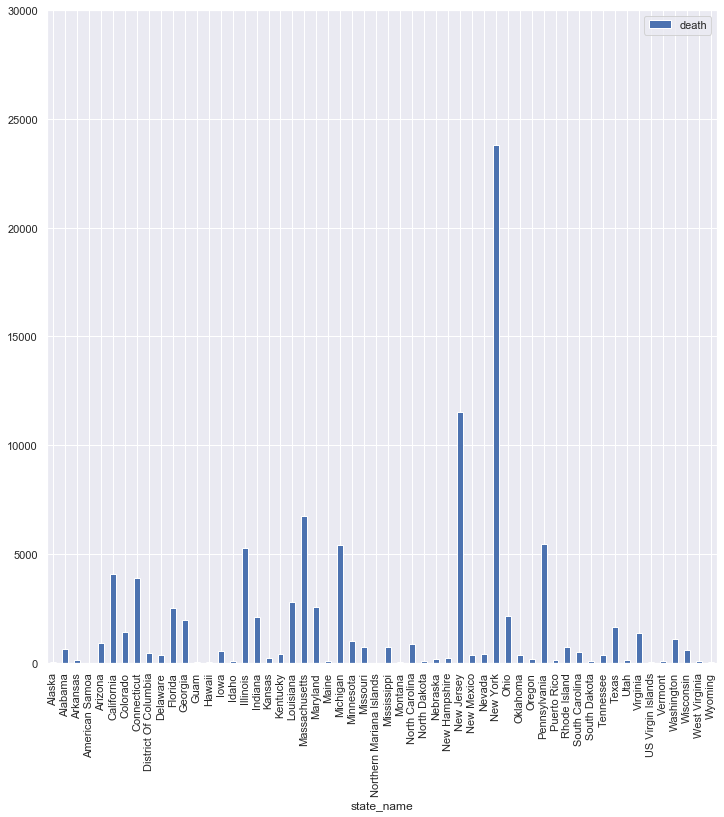

In [27]:
df3.loc['2020-05-29'].plot.bar(x='state_name', y='death', ylim=(0, 30000))

You decide to calucalte the total deaths in the whole US and plot it. 

In [11]:
df4 = df3.resample('D').sum()
df4.head()

,positive,negative,pending,recovered,death,hospitalized,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,
2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0.0
2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0.0
2020-01-24,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0.0
2020-01-25,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0.0
2020-01-26,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0.0


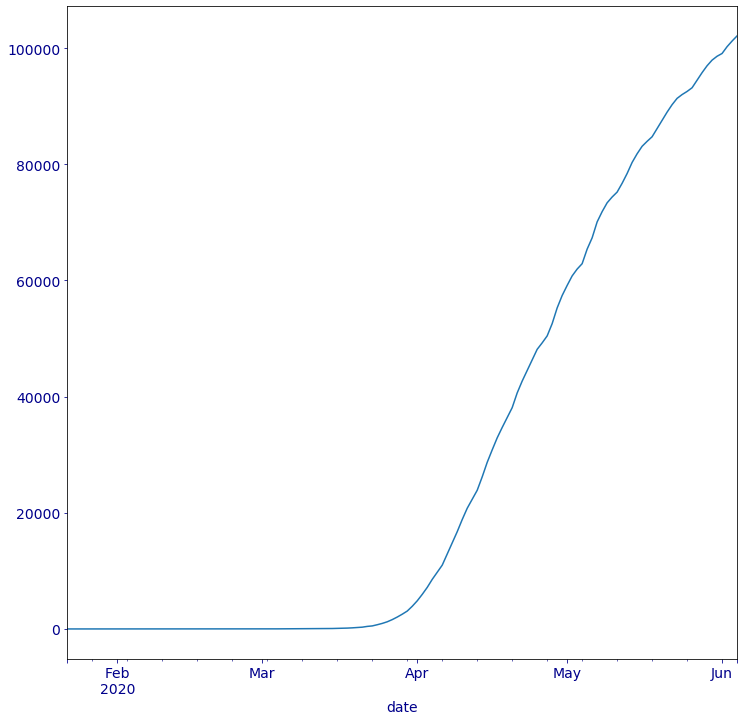

In [12]:
df4['death'].plot()

We also want to calculate the number of Active cases i.e.
> Active = positive - deaths - recovered

In [13]:
df4['active'] = df4['positive'] - df4['death'] - df4['recovered']

Now, after calculating active column, you want to plot active cases instead of death. So, you go to previous cell and replace `death` by `active` and generate the plot.

In [25]: df4['~~death~~'].plot()

In [25]: df4['active'].plot()

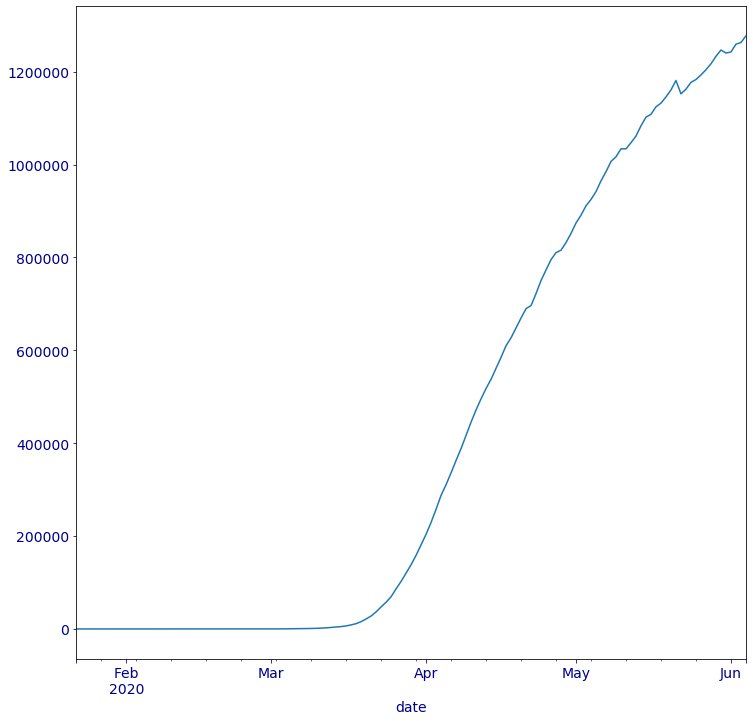

In [14]:
df4['active'].plot()

Then you decide to calculate statistics of a single month May only. Since the data is cumulative, you need to subtract the data of May from data of April to find the increase in various statistics in May.

In [15]:
df5 = (df3.loc['2020-05']
          .groupby('state_name')
          .agg({'positive': 'first',
                'negative': 'first',
                'pending': 'first',
                'recovered': 'first',
                'death': 'first',
                'hospitalized': 'first', 
                'total': 'first', 
                'totalTestResults': 'first',
                'deathIncrease': 'sum',
                'hospitalizedIncrease': 'sum', 
                'negativeIncrease': 'sum', 
                'positiveIncrease': 'sum',
                'totalTestResultsIncrease': 'sum'}))

df6 = (df3.loc['2020-04']
          .groupby('state_name')
          .agg({'positive': 'first',
                'negative': 'first',
                'pending': 'first',
                'recovered': 'first',
                'death': 'first',
                'hospitalized': 'first', 
                'total': 'first', 
                'totalTestResults': 'first',
                'deathIncrease': 'sum',
                'hospitalizedIncrease': 'sum', 
                'negativeIncrease': 'sum', 
                'positiveIncrease': 'sum',
                'totalTestResultsIncrease': 'sum'}))

df7 = df5.sub(df6)
df7.head()

,positive,negative,pending,recovered,death,hospitalized,total,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state_name,,,,,,,,,,,,,
Alabama,10884.0,119473.0,0.0,9355.0,362.0,866.0,130357,130357,106,-112,45594,4846,50440
Alaska,79.0,32497.0,0.0,116.0,1.0,0.0,32576,32576,-5,7,17327,-157,17170
American Samoa,0.0,171.0,-17.0,0.0,0.0,0.0,154,171,0,0,171,0,171
Arizona,12288.0,141132.0,0.0,3262.0,586.0,1829.0,153420,153420,290,660,95076,5929,101005
Arkansas,3998.0,77138.0,0.0,3970.0,72.0,309.0,81136,81136,19,-93,37973,1266,39239


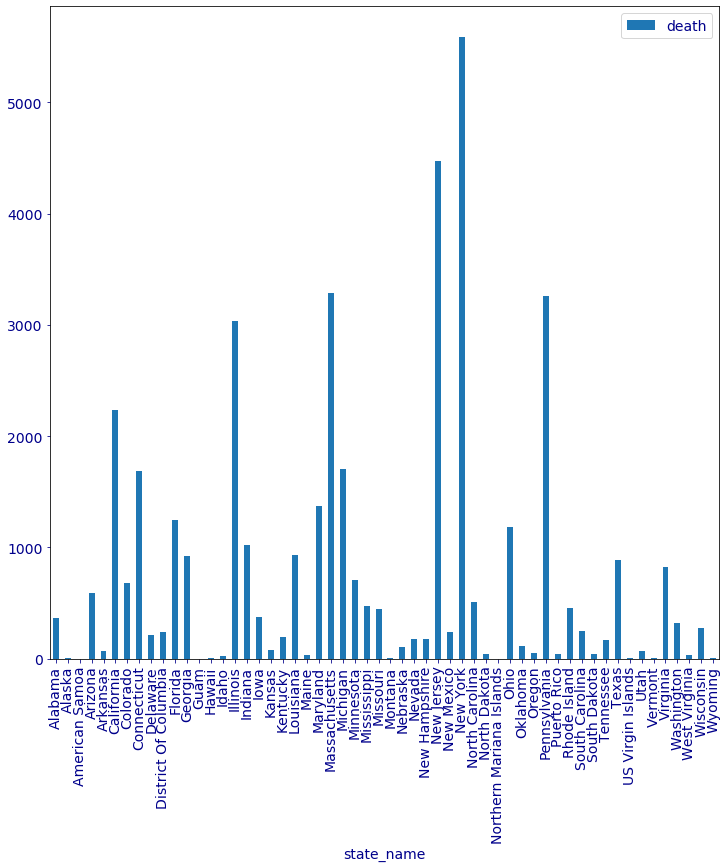

In [16]:
df7.plot.bar(y='death')


<a name="problems"/>

## Problems in the usual coding style

Now, let's discuss the problems in the above approach

### 1. Flow is disrupted:

The flow of the notebook is very difficult to understand and also creates problems. For example, we may create a variabe name under the plot that needs it. In the above code as well, we created **`df3['active']`** below the cell in which it is needed. So, it may cause errors when run by others. Also, you may have to scroll the notebook for miles and miles.

### 2. No reproducibility: 

When the notebook is shared with others, the other person faces a lot of problems to execute or understand the notebook. For instance, the name of the dataframes doesn't signify any information about the type of dataframe. It runs from **`df1`** to **`df7`** and creates a lot of confusions. But you want to create a notebook whih is very easy to iterate on and the one you can actually share with your colleagues. 

### 3. Difficult to move the code to production:

With this approach, your code is not ready to moved into prodcution. You end up having to rewrite the whole notebook before moving it to production which is obviously not effective.

### 4. Unable to automate: 

The notebook in the current condition cannot be automated for analysis since there may occur a lot of problems like error in code execution, unavailability of filenames used.

Although the code may give a interesting conclusion or desired output, we are not quite sure that conclusion is at least correct.

Despite having so many problems associated with this approach, it is common for everyone to still use this type of flow while making a notebook since while coding, people enjoy when the code works when they check the outputs and hence keep on continuing the coding in similar way. 

<a name="solution"/>

## Coding Solution



### 1. Naming convention

Follow a naming convention for the notebook according to the task as suggested by [Cookiecutter Data Science](https://drivendata.github.io/cookiecutter-data-science/#notebooks-are-for-exploration-and-communication) that shows the owner and the order the analysis was done in. You can use the format 

**`<step>-<ghuser>-<description>.ipynb`**

(e.g., **`0.1-ayush-visualize-corona-us.ipynb`**).



### 2. Plan your steps beforehand

Load the data and then think in advanced about all the steps of analysis or tasks you could be doing in the notebook. You don't need to think the logic rightaway but just keep in mind the steps.


In [17]:
df = pd.read_csv('data/covid19_us_states_daily.csv', index_col='date')

### 3. Create functions

You know that initially you want to clean the data and make sure the columns and indexes are in proper usable format. So, why not create a function for that and name it according to the subtasks on the dataframe. 

> For example, initally you want to make the index a proper datetime object. Then you may want to do ,... , then .... Just add these functions without even thinking the logic and then later you can add the logics. This way, you will be on track and not lost.

The functions are created after creating the decorator.


### 4. Create proper decorators

Before adding functions, let's also think about some additional utility that would be helpful. During the pandas analysis, you often check the shape, columns, and other information associated to the dataframe after performing an operation. However, decorator can help automate this process. 

**`Decorator`** is simply a function that expects a function and returns a function. It's really functional right, haha. Don't get confused by the definition. It is not so difficult as it sounds. We will see how it works in the code below.

Also, if you are not familiar with decorators or want to learn more about it, you can visit the [article by Geir Arne Hjelle](https://realpython.com/primer-on-python-decorators/#simple-decorators).





In [18]:
import datetime as dt
def df_info(f):
    def wrapper(df, *args, **kwargs):
        tic = dt.datetime.now()
        result = f(df, *args, **kwargs)
        toc = dt.datetime.now()
        print("\n\n{} took {} time\n".format(f.__name__, toc - tic))
        print("After applying {}\n".format(f.__name__))
        print("Shape of df = {}\n".format(result.shape))
        print("Columns of df are {}\n".format(result.columns))
        print("Index of df is {}\n".format(result.index))
        for i in range(100): print("-", end='')
        return result
    return wrapper

We have created a decorator called **`df_info`** which displays information like time taken by the function, shape and columns after appling any function **`f`**.

The advantage of using deorator is that we get logging. You can modify the decorator according to the information that you want to log or display after applying performing an operation on the dataframe.

Now, we create functions as our plan and use these decorators on them by using **`@df_info`**. This will be equivalent to calling **`df_info(f(df, *args, **kwargs))`**

In [19]:
@df_info
def create_dateindex(df):
    df.index = pd.to_datetime(df.index, format="%Y%m%d")
    return df

@df_info
def remove_columns(df):
    df.drop([*df.columns[4:10], *df.columns[11:15], 'posNeg', 'fips'], 
        axis=1, inplace=True)
    return df

@df_info
def fill_missing(df):
    df.fillna(value=0, inplace=True)
    return df

@df_info
def add_state_name(df):
    _df = pd.read_csv('data/state_info.csv', usecols=['state', 'name'])
    df = (df
      .reset_index()
      .merge(_df, on='state', how='left', left_index=True))
    df.set_index('date', inplace=True)
    df.rename(columns={'name': 'state_name'}, inplace=True)
    return df

@df_info
def drop_state(df):
    df.drop(columns=['state'], inplace=True)
    return df

@df_info
def sample_daily(df):
    df = df.resample('D').sum()
    return df

@df_info
def add_active_cases(df):
    df['active'] = df['positive'] - df['death'] - df['recovered']
    return df

def aggregate_monthly(df, month):
    df = (df.loc[month]
        .groupby('state_name')
        .agg({'positive': 'first',
            'negative': 'first',
            'pending': 'first',
            'recovered': 'first',
            'death': 'first',
            'hospitalized': 'first', 
            'total': 'first', 
            'totalTestResults': 'first',
            'deathIncrease': 'sum',
            'hospitalizedIncrease': 'sum', 
            'negativeIncrease': 'sum', 
            'positiveIncrease': 'sum',
            'totalTestResultsIncrease': 'sum'}))
    return df

@df_info
def create_month_only(df, month):
    df_current = aggregate_monthly(df, month)
    if int(month[-2:]) == 0:
        prev_month = str(int(month[:4]) - 1) + '-12'
    else:
        prev_month = month[:5] + '{:02d}'.format(int(month[-2:])-1)

    df_previous = aggregate_monthly(df, prev_month)
    df = df_current.sub(df_previous)
    return df

    

### 5. Remove side effect
 
However, these function make changes which are inplace (side effects) i.e. modifies the original loaded dataframe. So, to solve this, we add a function called start pipeline, which returns a copy of dataframe.


In [20]:
def start_pipeline(df):
    return df.copy()

### 6. Constructing pandas pipelines (Main step)

Now, let's use this functions to achieve the previous tasks using **`pipe`**



create_dateindex took 0:00:00.001461 time

After applying create_dateindex

Shape of df = (5113, 34)

Columns of df are Index(['state', 'positive', 'negative', 'pending', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt',
       'death', 'hospitalized', 'dateChecked', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'],
      dtype='object')

Index of df is DatetimeIndex(['2020-06-04', '2020-06-04', '2020-06-04', '2020-06-04',
               '2020-06-04', '2020-06-04', '2020-06-04', '2020-06-04',
               '2020-06-04', '2020-06-04',
               ...
   

array([<matplotlib.axes._subplots.AxesSubplot object at 0x121203ac8>,
      dtype=object)

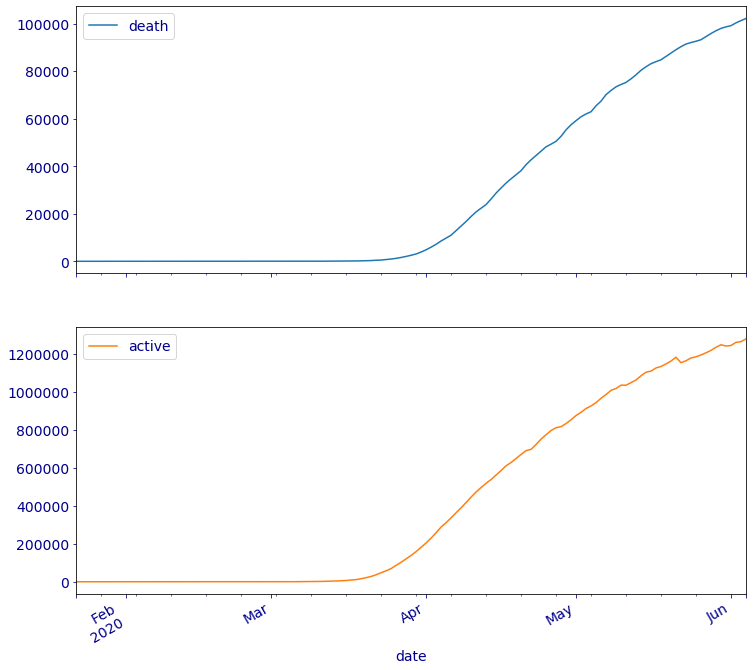

In [21]:
df_daily = (df.pipe(start_pipeline)
            .pipe(create_dateindex)
            .pipe(remove_columns)
            .pipe(fill_missing)
            .pipe(add_state_name)
            .pipe(drop_state)
            .pipe(sample_daily)
            .pipe(add_active_cases))



create_dateindex took 0:00:00.002109 time

After applying create_dateindex

Shape of df = (5113, 34)

Columns of df are Index(['state', 'positive', 'negative', 'pending', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt',
       'death', 'hospitalized', 'dateChecked', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'],
      dtype='object')

Index of df is DatetimeIndex(['2020-06-04', '2020-06-04', '2020-06-04', '2020-06-04',
               '2020-06-04', '2020-06-04', '2020-06-04', '2020-06-04',
               '2020-06-04', '2020-06-04',
               ...
   

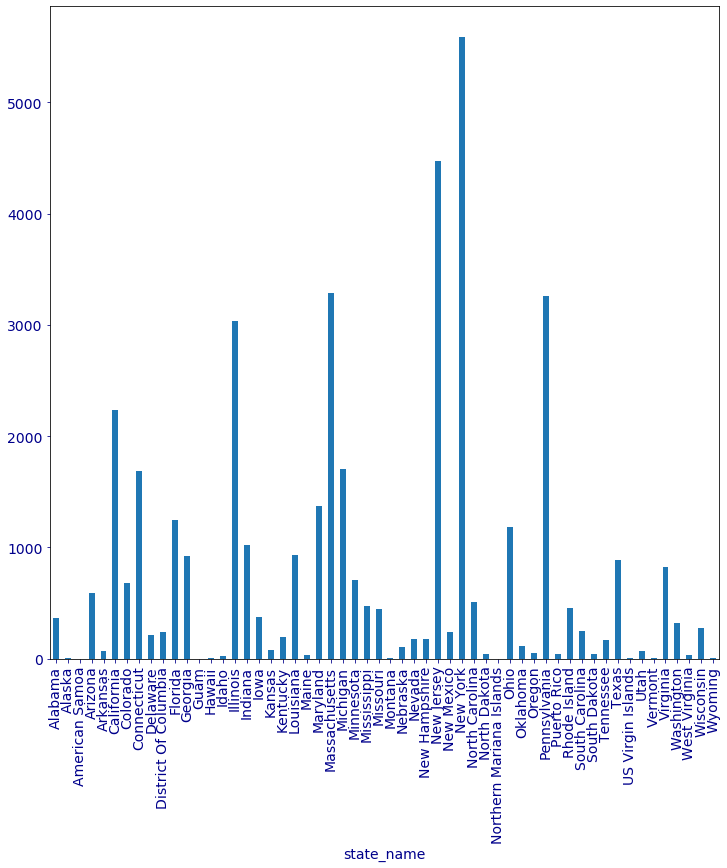

In [22]:
df_may = create_month_only(
                df=(df.pipe(start_pipeline)
                    .pipe(create_dateindex)
                    .pipe(remove_columns)
                    .pipe(fill_missing)
                    .pipe(add_state_name)), 
                month='2020-05')

You can observe how easily pipe functionality has achieved the required task in a clean and organized way. Also, the original dataframe is intact and not affected by the above operations.

In [23]:
df.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
20200604,AK,513.0,59584.0,NaN,13.0,NaN,NaN,NaN,1.0,NaN,...,60097,0,0,c1046011af7271cbe2e6698526714c6cb5b92748,0,0,0,0,0,NaN
20200604,AL,19072.0,216227.0,NaN,NaN,1929.0,NaN,601.0,NaN,357.0,...,235299,0,29,bcbefdb36212ba2b97b5a354f4e45bf16648ee23,0,0,0,0,0,NaN
20200604,AR,8067.0,134413.0,NaN,138.0,757.0,NaN,NaN,30.0,127.0,...,142480,0,26,acd3a4fbbc3dbb32138725f91e3261d683e7052a,0,0,0,0,0,NaN
20200604,AS,0.0,174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,174,0,0,8bbc72fa42781e0549e2e4f9f4c3e7cbef14ab32,0,0,0,0,0,NaN
20200604,AZ,22753.0,227002.0,NaN,1079.0,3195.0,375.0,NaN,223.0,NaN,...,249755,15,66,1fa237b8204cd23701577aef6338d339daa4452e,0,0,0,0,0,NaN



### 7. Create a module

Finally, you can create a module (eg `processing.py`) and keep all the above functions in the module. You can simply import them here and use it directly. It will clean the notebook further. 

**`processing.py`**

<script src="https://gist.github.com/ayushkumarshah/aa35d7fbfb9474d2a615665766d20a35.js"></script>

While loading the modules, load the "autoreload" extension so that you can change code in the modules and the changes get updated automatically. For more info, see [autoreload documentation](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html)

In [24]:
%load_ext autoreload
%autoreload 2
from processing import *

ModuleNotFoundError: No module named 'processing'

<a name="advantages"/>

## Advantages

### 1. Effective for long run (Maintainability)

Although, the approach may look like an inefficient method of coding but it is very effective for the long run since you will not have to spend hours maintaining the notebook. Given the functions are well written and well defined, they are ready for production.

The code is easily sharable as well as anyone can understand the code unlike in the previous appraoch. Also, for complex analysis tasks, this approach can be esaily used for maintaining the notebook.

### 2. Proper flow and planning

You do not need to think about logic of the analysis at the beginning. You can just plan your tasks and write down the required functions which already gives you kind of a framework of mind which helps to be on track. The calm that will follow is likely going to have a greater impact in innovation. 

Then, you can finally define the logic at the end to make it actually work.  

### 3. Easier to modify

You might have noticed that the `pipe` functionality gives you the ability to modify the tasks or flow easily. You can do so by commenting or adding the functions in the pipeline.

For example, you don't want to remove the columns and sample the data daily. Then you can achieve this simply by commenting those lines as shown below:



In [ ]:
df_daily = (df.pipe(start_pipeline)
            .pipe(create_dateindex)
            # .pipe(remove_columns)
            .pipe(fill_missing)
            .pipe(add_state_name)
            .pipe(drop_state)
            # .pipe(sample_daily)
            .pipe(add_active_cases))

### 4. Easier to debug

In this approach, you know what is actually happening in each step which makes it a lot easier to debug. Furthermore, since all the operations are functions, you can easily debug the code by performing unit tests or using other methods on the functions. 

### 5. Readability

This approach helps you prevent miles of scrolling and also is easily readable than the previous approach. By lloking at the code, you can easily understand what operations are being performed on the data and also can see the effect of those operations on the data in each step using decorator.

Example:

Let us consider cooking chicken. When we do so, we don't describe the steps like this:

```
temperature = 210 celsius
food1 = Chicken
food2 = Season(food1, with Spices)
food3 = Season(food2, with Gravy)
Serve(PutInOven(food3, temperature), on a plate)
```

But instead, we describe it the following way:

```
temperature = 210 celsius
Chicken.Season(with Spices)
        .Season(with Gravy)
        .PutInOven(temperature)
        .Serve()
```

The pipe functionality helps us to write code in the latter way, which is alos much more readable.

### 6. Reusability

During production, we turn the project into a Python package. You can import your code and use it in notebooks with a cell. You do not need to write code to do the same task in multiple notebooks. 

### 7. Separation into analysis and data manipulation

Once your functions have been moved to a separate module, two levels of abstraction is obtained: analysis and data manipulation. 

You can fiddle around on a high level and keep the details on a low level. The notebook
then becomes the summary and a user interface where you can very quickly make nice little charts instead of manipulating data or performing analytical steps to get a result.

# Final notes

Hence, following these practices while coding in pandas or other similar tasks like scikin-learn pipelines or other ML pipelnes, can be extremely beneficial for developers. Also, all the 4 problems mentioned in the beginning has been solved in this approach. Thus, giving utmost priority to clarity and interoperability, we should remember that it's a lot easier to solve a problem if you understand the problem well. 


Moreover, if you find writing these codes difficult, then Vincent and his team has developed  a package called [Scikit-lego](https://scikit-lego.readthedocs.io/en/latest/pandas_pipeline.html#) which does all this for you with additional features like custom logging. Do check it out. 




